In [23]:
from netCDF4 import Dataset
from scipy import ndimage
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
file_path = 'C://Users/rjackson/Downloads/S20160331T160007.nc'

In [31]:
cdf_file = Dataset(file_path)
print(cdf_file.variables.keys())
vbins = cdf_file['vbins'][:]
snr = cdf_file['snr'][:]
secs = cdf_file['secs'][:]
Zr = cdf_file['Ze'][:]
height = cdf_file['height'][:]

[u'vbins', u'height', u'secs', u'Zef', u'sf', u'sn', u'sff', u'snr', u'Ze', u'vel', u'wid']


In [63]:
def linear_texture_1d(image, N, axis=0, boundary_condition='reflect'):
    """
    Compute the 1D linear texture of an image given an N x ! window.
    This will only do the texture along one axis (useful for vertically
    pointing radar data)

    Parameters
    ----------
    image: 2D array of floats
        The image to calculate the texture of
    N: int
        The size of the window to calculate the standard deviation
        over.
    axis:
        Axis to calculate standard deviation over.
    boundary_condition:
        This determines how the edges are handled when calculating texture.
        'reflect' = 

    Returns
    -------
    std_dev: 2D array of floats (N x N)
        The linear texture of the image

    """

    mean_kernel = np.ones(N)/float(N)
    sum_kernel = np.ones(N)
    image = image.astype(float)
    image_squared = image**2
    sum_squares = ndimage.convolve1d(
        image_squared, sum_kernel, axis=axis, mode='reflect')
    sum_array = ndimage.convolve1d(
        image, sum_kernel, axis=axis, mode='reflect')
    print(sum_array)

    variance = 1.0/float(N+1)*(sum_squares.astype(float) - sum_array.astype(float)**2/float(N))

    return np.sqrt(variance)


[[ 1826.  1811.  2011. ...,   497.   534.   535.]
 [ 1828.  1804.  2000. ...,   597.   597.   600.]
 [ 1829.  1803.  1998. ...,   685.   688.   689.]
 ..., 
 [ 1247.  1321.  1672. ...,   949.   947.   947.]
 [ 1249.  1320.  1671. ...,   984.   984.   980.]
 [ 1259.  1329.  1676. ...,  1023.  1021.  1019.]]
(219L, 1024L)


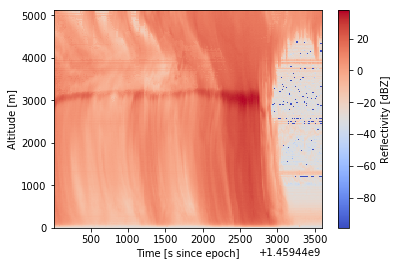

In [78]:
x, y = np.meshgrid(secs, height)
snr_texture = linear_texture_1d(snr, 5, axis=1)
print(Zr.shape)
plt.pcolormesh(x, y, np.transpose(Zr)/10.0, cmap='coolwarm')
plt.colorbar(label='Reflectivity [dBZ]')
plt.xlabel('Time [s since epoch]')
plt.ylabel('Altitude [m]')

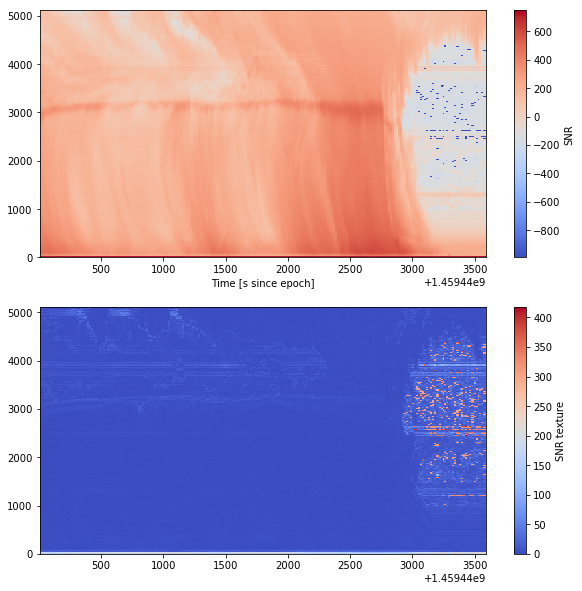

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.pcolormesh(x, y, np.transpose(snr), cmap='coolwarm')
plt.xlabel('Time [s since epoch]')
plt.colorbar(label='SNR')
plt.subplot(212)
plt.pcolormesh(x, y, np.transpose(snr_texture), cmap='coolwarm')
plt.colorbar(label='SNR texture')

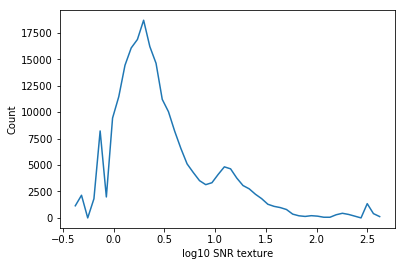

In [87]:
hist, bins = np.histogram(np.log10(snr_texture[snr_texture > 0]), bins=50)
plt.plot(bins[1:],hist)
plt.xlabel('log10 SNR texture')
plt.ylabel('Count')

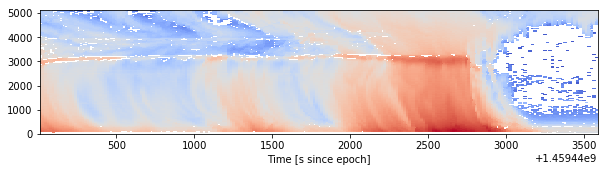

In [101]:
plt.figure(figsize=(10,5))
snr_masked = np.ma.masked_where(snr_texture > 4, snr)
plt.subplot(211)
plt.pcolormesh(x, y, np.transpose(snr_masked), cmap='coolwarm')
plt.xlabel('Time [s since epoch]')